# Case Study - Portfolio Optimization
In this case study, we will build two $10,000 investment portfolios containing six stocks. The *first portfolio* will have an *equal weighting between the stocks*. The *second portfolio* will be optimized with a *weighting allocation* that provides the best return, adjusted for risk. To build these two portfolios, we will:

1. Import two years of data for six stocks
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equally weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results



## Import Packages & Connect to Data

In [1]:
# Import packages needed for case study
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # matplotlib inline
# pd.set_option('mode.chained_assignment', None)

In [2]:
# We fetch our data from yahoo finance
import yfinance as yf

In [3]:
# Creating a list for the six stock ticker symbols of 
# Advanced Micro Devices Inc, Apple Inc, Microsoft, Oracle, Google, and Tesla
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL', 'GOOGL', 'TSLA']

# Create dictionary to store stock data
stocks = {}

# Download 2 years of daily data for each stock
for ticker in stock_list:
    stocks[ticker] = yf.download(ticker, period="2y", auto_adjust=False)

    # stocks[ticker] = stocks[ticker].reset_index()
    if 'Adj Close' not in stocks[ticker].columns:
        stocks[ticker].rename(columns={'Close': 'Adj Close'}, inplace=True)
    #stocks[ticker] = data
    

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
# Examine the 'AMD' Adj Close from the stocks dictionary to confirm the data fetch correctly
stocks['AMD']

Price        Adj Close       Close        High         Low        Open  \
Ticker             AMD         AMD         AMD         AMD         AMD   
Date                                                                     
2023-10-17  105.139999  105.139999  106.290001  101.660004  103.540001   
2023-10-18  102.169998  102.169998  104.779999  101.739998  103.379997   
2023-10-19  102.400002  102.400002  105.599998  101.839996  103.809998   
2023-10-20  101.809998  101.809998  104.339996  101.440002  102.279999   
2023-10-23  100.010002  100.010002  102.419998   99.320000  100.809998   
...                ...         ...         ...         ...         ...   
2025-10-10  214.899994  214.899994  234.220001  213.199997  232.770004   
2025-10-13  216.419998  216.419998  224.190002  214.899994  220.199997   
2025-10-14  218.089996  218.089996  224.979996  215.899994  219.199997   
2025-10-15  238.600006  238.600006  239.240005  220.759995  222.710007   
2025-10-16  234.559998  234.559998  241.199997  233.910004  236.285004   

Price          Volume  
Ticker            AMD  
Date                   
2023-10-17   49642100  
2023-10-18   50450000  
2023-10-19   52734200  
2023-10-20   61317900  
2023-10-23   50817400  
...               ...  
2025-10-10  118656600  
2025-10-13   63104000  
2025-10-14   71216300  
2025-10-15  108481000  
2025-10-16   68951339  

[502 rows x 6 columns]

## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, we need to add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that we will build are:
* Normalized Return = *i*th Adjusted Close / Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return / 6 (equal weighting for each of the stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

In [5]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

In [6]:
stocks['AAPL'].head()

Price        Adj Close       Close        High         Low        Open  \
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-10-17  175.431656  177.149994  178.419998  174.800003  176.649994   
2023-10-18  174.134384  175.839996  177.580002  175.110001  175.580002   
2023-10-19  173.758057  175.460007  177.839996  175.190002  176.039993   
2023-10-20  171.203094  172.880005  175.419998  172.639999  175.309998   
2023-10-23  171.321915  173.000000  174.009995  169.929993  170.910004   

Price         Volume Normalized Return  
Ticker          AAPL                    
Date                                    
2023-10-17  57549400          1.000000  
2023-10-18  54764400          0.992605  
2023-10-19  59302900          0.990460  
2023-10-20  64244000          0.975896  
2023-10-23  55980100          0.976574

In [7]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    allocation = 1 / len(stock_list)
    stock_data['Allocation'] = stock_data['Normalized Return'] * allocation

In [8]:
stocks['MSFT'].head()

Price        Adj Close       Close        High         Low        Open  \
Ticker            MSFT        MSFT        MSFT        MSFT        MSFT   
Date                                                                     
2023-10-17  327.130127  332.059998  333.459991  327.410004  329.589996   
2023-10-18  325.209137  330.109985  335.589996  328.299988  332.489990   
2023-10-19  326.401154  331.320007  336.880005  330.910004  332.149994   
2023-10-20  321.820221  326.670013  331.920013  325.450012  331.720001   
2023-10-23  324.430878  329.320007  332.730011  324.390015  325.470001   

Price         Volume Normalized Return Allocation  
Ticker          MSFT                               
Date                                               
2023-10-17  18338500          1.000000   0.166667  
2023-10-18  23153600          0.994128   0.165688  
2023-10-19  25052100          0.997772   0.166295  
2023-10-20  25027700          0.983768   0.163961  
2023-10-23  24374700          0.991749   0.165291

In [9]:
# Set the value of the portfolio to $10k
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [10]:
stocks['AMD'].head()

Price        Adj Close       Close        High         Low        Open  \
Ticker             AMD         AMD         AMD         AMD         AMD   
Date                                                                     
2023-10-17  105.139999  105.139999  106.290001  101.660004  103.540001   
2023-10-18  102.169998  102.169998  104.779999  101.739998  103.379997   
2023-10-19  102.400002  102.400002  105.599998  101.839996  103.809998   
2023-10-20  101.809998  101.809998  104.339996  101.440002  102.279999   
2023-10-23  100.010002  100.010002  102.419998   99.320000  100.809998   

Price         Volume Normalized Return Allocation Position Value  
Ticker           AMD                                              
Date                                                              
2023-10-17  49642100          1.000000   0.166667    1666.666667  
2023-10-18  50450000          0.971752   0.161959    1619.586563  
2023-10-19  52734200          0.973940   0.162323    1623.232549  
2023-10-20  61317900          0.968328   0.161388    1613.879877  
2023-10-23  50817400          0.951208   0.158535    1585.346565

## Visualize the Portfolio Performance
To visualize the performance of the portfolio, we can create two line charts that show the return of the portfolio, and the return of the individual stocks, over time. Let's build a new DataFrame that contains just the `position value` for each stock, as well as the total value for the portfolio. We can use this DataFrame to create the two visuals.

In [11]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [12]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values.head()

AMD         AAPL         MSFT         ORCL        GOOGL  \
Date                                                                          
2023-10-17  1666.666667  1666.666667  1666.666667  1666.666667  1666.666667   
2023-10-18  1619.586563  1654.342098  1656.879583  1654.591405  1645.672348   
2023-10-19  1623.232549  1650.766845  1662.952684  1655.967024  1643.167207   
2023-10-20  1613.879877  1626.493744  1639.613691  1556.768073  1617.520903   
2023-10-23  1585.346565  1627.622581  1652.914498  1584.433644  1628.256591   

                   TSLA  
Date                     
2023-10-17  1666.666667  
2023-10-18  1587.077280  
2023-10-19  1439.474170  
2023-10-20  1386.371071  
2023-10-23  1386.959628

In [13]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

In [14]:
position_values

AMD         AAPL         MSFT         ORCL        GOOGL  \
Date                                                                          
2023-10-17  1666.666667  1666.666667  1666.666667  1666.666667  1666.666667   
2023-10-18  1619.586563  1654.342098  1656.879583  1654.591405  1645.672348   
2023-10-19  1623.232549  1650.766845  1662.952684  1655.967024  1643.167207   
2023-10-20  1613.879877  1626.493744  1639.613691  1556.768073  1617.520903   
2023-10-23  1585.346565  1627.622581  1652.914498  1584.433644  1628.256591   
...                 ...          ...          ...          ...          ...   
2025-10-10  3406.568942  2330.157225  2603.245362  4577.709527  2841.416787   
2025-10-13  3430.663868  2352.863117  2618.988314  4812.876833  2932.459186   
2025-10-14  3457.136478  2353.908165  2616.542904  4672.088983  2948.073382   
2025-10-15  3782.258695  2368.823679  2615.829555  4744.279713  3015.094181   
2025-10-16  3718.216963  2350.867975  2606.556959  4890.849002  3020.258960   

                   TSLA         Total  
Date                                   
2023-10-17  1666.666667  10000.000000  
2023-10-18  1587.077280   9818.149276  
2023-10-19  1439.474170   9675.560479  
2023-10-20  1386.371071   9440.647359  
2023-10-23  1386.959628   9465.533506  
...                 ...           ...  
2025-10-10  2704.139561  18463.237404  
2025-10-13  2850.696380  18998.547699  
2025-10-14  2807.141325  18854.891236  
2025-10-15  2845.791534  19372.077357  
2025-10-16  2803.936889  19390.686748  

[502 rows x 7 columns]

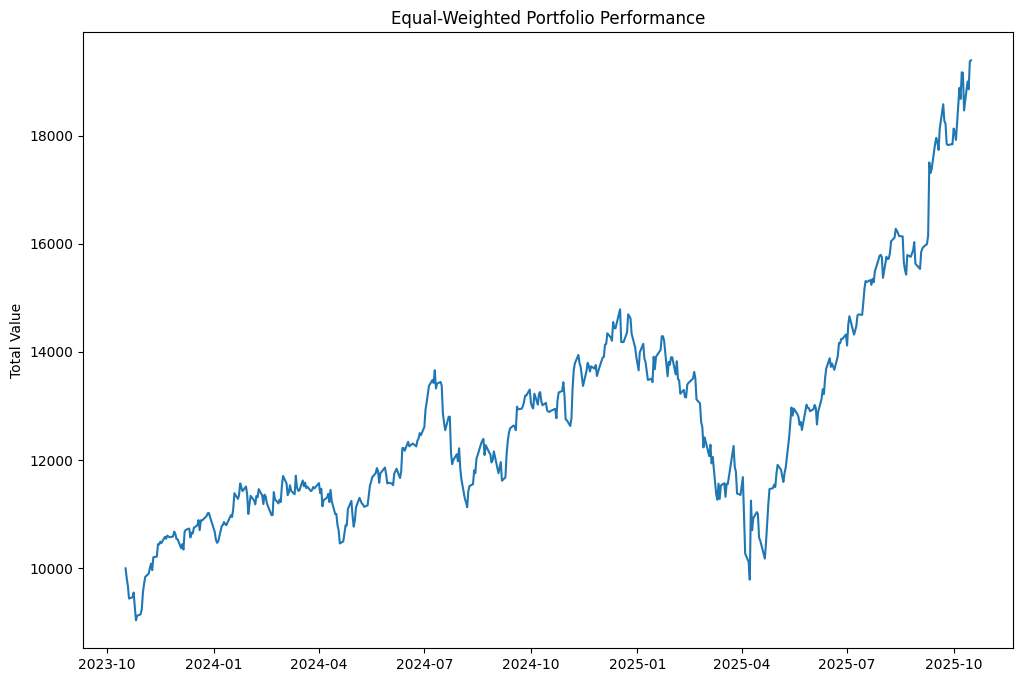

In [15]:
# View the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value')
plt.show()

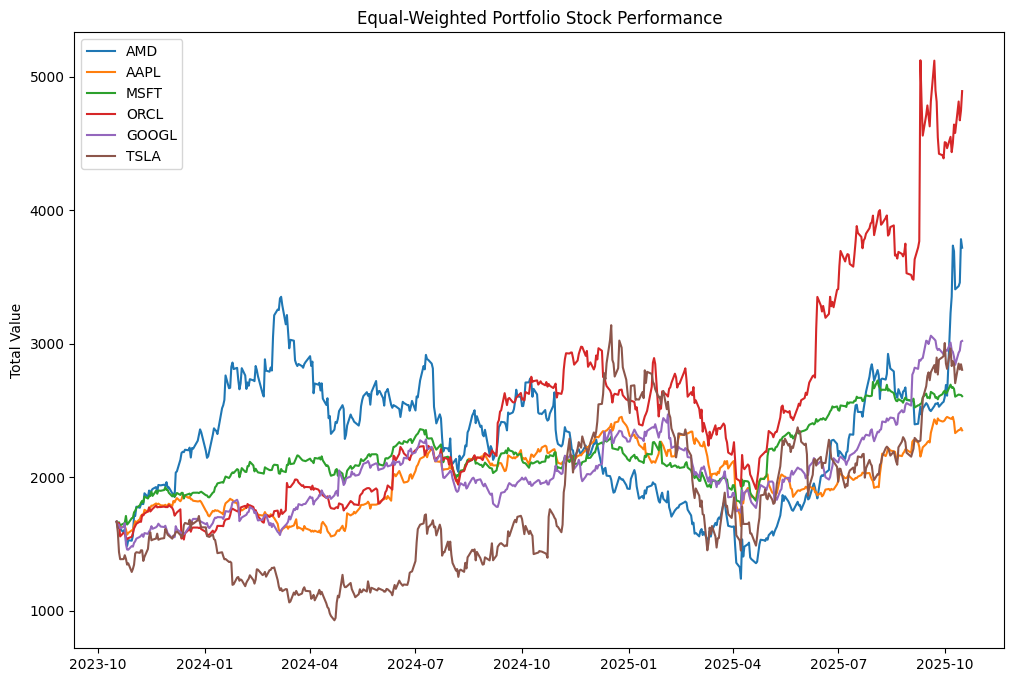

In [16]:
# View the stocks in the portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values.iloc[:,0:6])
plt.legend(position_values,loc="upper left", fontsize=10, frameon=True)

plt.title('Equal-Weighted Portfolio Stock Performance')
plt.ylabel('Total Value')
plt.show();

## Calculate Performance Metrics for the Portfolio
Now that we have created and visualized the equal-weighted portfolio, we can calculate a few metrics to further measure the performance of the portfolio. We will create five performances metrics:
 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [17]:
# Define the end and start value of the portfolio
end_value = position_values['Total'].iloc[-1]
start_value = position_values['Total'].iloc[0]

In [18]:
# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print('The cummulative return is', str(round(cumulative_return*100,2)), '%')

The cummulative return is 93.91 %


In [19]:
# Create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change().infer_objects(copy=False)

position_values.head()

AMD         AAPL         MSFT         ORCL        GOOGL  \
Date                                                                          
2023-10-17  1666.666667  1666.666667  1666.666667  1666.666667  1666.666667   
2023-10-18  1619.586563  1654.342098  1656.879583  1654.591405  1645.672348   
2023-10-19  1623.232549  1650.766845  1662.952684  1655.967024  1643.167207   
2023-10-20  1613.879877  1626.493744  1639.613691  1556.768073  1617.520903   
2023-10-23  1585.346565  1627.622581  1652.914498  1584.433644  1628.256591   

                   TSLA         Total  Daily Return  
Date                                                 
2023-10-17  1666.666667  10000.000000           NaN  
2023-10-18  1587.077280   9818.149276     -0.018185  
2023-10-19  1439.474170   9675.560479     -0.014523  
2023-10-20  1386.371071   9440.647359     -0.024279  
2023-10-23  1386.959628   9465.533506      0.002636

In [20]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Return'].mean()

print('The mean daily return is:', str(round(mean_daily_return, 4)))

The mean daily return is: 0.0015


In [21]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Return'].std()

print('The std daily return is:', str(round(std_daily_return, 4)))

The std daily return is: 0.018


### Sharpe Ratio
Now, let's explore a risk-adjusted return metric called the sharpe ratio. The sharpe ratio helps us quantify how much return we are getting by a given level of risk. When comparing two different investments against the same benchmark, the asset with the higher Sharpe ratio provides a higher return for the same amount of risk or the same return for a lower risk than the other asset. 

It is calculated by the average return of the portfolio minus a risk-free rate (such as government bonds), divided by the standard deviation of the return. In this case, we assume the risk-free rate is close to zero, so we won't add it to the formula.

In [22]:
# Calculate the sharpe ratio
# 5% annual ≈ 0.000198 daily considering only 252 business days
risk_free_rate = 0.05 / 252   
sharpe_ratio = (mean_daily_return - risk_free_rate) / std_daily_return

print(sharpe_ratio)

0.07121574890542114


In [23]:
# zero risk free rate
sharpe_ratio_zrf = mean_daily_return / std_daily_return
print(sharpe_ratio_zrf)

0.08221238340096912


In [24]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252 ** 0.5

print(sharpe_ratio_annualized)

1.130514966209788


## 📈 Portfolio Performance Summary (Equal-Weighted Tech Stocks)

1. Equal-Weighted Portfolio

This first portfolio was constructed by allocating an equal share of the investment to each stock. Key steps included:

	•	Normalizing adjusted closing prices to track growth from a common starting point.
	•	Allocating weights equally across the six stocks (≈16.7% each).
	•	Computing portfolio position values and total value over time.

This provided a baseline for comparison, illustrating how an equally diversified portfolio evolves without optimization.

2. Performance Evaluation

The equal-weighted portfolio was evaluated using standard performance metrics:

	•	Cumulative Return: Overall portfolio growth relative to the starting value.
	•	Mean Daily Return: Average return per day.
	•	Volatility: Standard deviation of daily returns, representing risk.
	•	Sharpe Ratio: Risk-adjusted return, annualized by multiplying by √252.

In [25]:
print('Key Metrics: \n',
      'The cummulative return is', str(round(cumulative_return*100,2)),'% \n',
      'The mean daily return is:', str(round(mean_daily_return, 4)), '\n',
        'The std daily return is:', str(round(std_daily_return, 4)), '\n',
        'The sharpe ratio is:', str(round(sharpe_ratio, 4)), '\n',
        'Using zero risk free rate, the sharpe ratio is:', str(round(sharpe_ratio_zrf, 4)), '\n',
        'The annualized sharpe ratio is:', str(round(sharpe_ratio_annualized, 4)), '\n')

Key Metrics: 
 The cummulative return is 93.91 % 
 The mean daily return is: 0.0015 
 The std daily return is: 0.018 
 The sharpe ratio is: 0.0712 
 Using zero risk free rate, the sharpe ratio is: 0.0822 
 The annualized sharpe ratio is: 1.1305 



These metrics quantify both profitability and risk exposure.

### Risk & Exposure

This analysis evaluates an equal-weighted investment strategy using historical data from six major technology companies: **AMD, Apple, Microsoft, Oracle, Google, and Tesla**.

### 🔹 Key Metrics

- **Cumulative Return**: indicates the *portfolio growth over the investment period*.

- **Mean Daily Return**: indicates the *average daily gain* showing consistent growth.

- **Standard Deviation (Daily)**: Reflects relatively high *volatility* typical of tech stocks.

- **Sharpe Ratio (Raw)**: is the *risk-adjusted return*, assuming a non-zero risk-free rate. The Sharpe ratio tells you how much return you get per unit of risk. A low value suggests a modest return compared to the risk.

- **Sharpe Ratio (Zero Risk-Free Rate)**: is the *risk-adjusted return*, assuming a zero risk-free rate. Same idea as above, but assuming zero risk-free rate. Still similar performance.

- **Annualized Sharpe Ratio**: Indicates the **risk-adjusted return** (Sharpe > 1 is generally considered acceptable).

### 🧠 Interpretation

- The portfolio delivered **strong absolute returns** with **moderate-to-high volatility**.
- The **Sharpe ratio suggests decent compensation for risk**, making this equal-weighted approach a solid baseline.
- There's potential to improve results through more advanced portfolio optimization strategies

✅ This equal-weighted tech portfolio serves as a **good benchmark** for comparing more sophisticated strategies.

## Optimizing Portfolio Weighting using Monte Carlo Simulation
To identify an optimal allocation, we employed Monte Carlo simulation within the framework of Modern Portfolio Theory (MPT):
	•	Monte Carlo Simulation: 10,000 random portfolios are generated by assigning random weight combinations to the six stocks.
	•	For each simulated portfolio, expected annual return, volatility, and Sharpe ratio were computed.
	•	The process approximates the efficient frontier, that is, the set of portfolios that offer the highest return for a given level of risk.
	•	The portfolio with the maximum Sharpe ratio is the optimal allocation, representing the best risk-return trade-off.

### Preparing Scenarios
We need to prepare our data ahead of generating our scenarios to optimize the portfolio weighting. We will:
 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percent change from the previous day

In [26]:
# Create stock_adj_close dictionary
stock_adj_close = {}

stock_adj_close = pd.concat(
    {ticker: data['Adj Close'] for ticker, data in stocks.items()},
    axis=1)

In [27]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data = stock_adj_close)
stock_adj_close.columns = stock_adj_close.columns.droplevel(1)

# Ensure index is Date and sorted
stock_adj_close

AMD        AAPL        MSFT        ORCL       GOOGL  \
Date                                                                     
2023-10-17  105.139999  175.431656  327.130127  106.661781  138.762939   
2023-10-18  102.169998  174.134384  325.209137  105.889000  137.014999   
2023-10-19  102.400002  173.758057  326.401154  105.977036  136.806427   
2023-10-20  101.809998  171.203094  321.820221   99.628593  134.671173   
2023-10-23  100.010002  171.321915  324.430878  101.399109  135.565002   
...                ...         ...         ...         ...         ...   
2025-10-10  214.899994  245.270004  510.959991  292.959991  236.570007   
2025-10-13  216.419998  247.660004  514.049988  308.010010  244.149994   
2025-10-14  218.089996  247.770004  513.570007  299.000000  245.449997   
2025-10-15  238.600006  249.339996  513.429993  303.619995  251.029999   
2025-10-16  234.559998  247.449997  511.609985  313.000000  251.460007   

                  TSLA  
Date                    
2023-10-17  254.850006  
2023-10-18  242.679993  
2023-10-19  220.110001  
2023-10-20  211.990005  
2023-10-23  212.080002  
...                ...  
2025-10-10  413.489990  
2025-10-13  435.899994  
2025-10-14  429.239990  
2025-10-15  435.149994  
2025-10-16  428.750000  

[502 rows x 6 columns]

In [28]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()

stock_returns.head()

AMD      AAPL      MSFT      ORCL     GOOGL      TSLA
Date                                                                  
2023-10-17       NaN       NaN       NaN       NaN       NaN       NaN
2023-10-18 -0.028248 -0.007395 -0.005872 -0.007245 -0.012597 -0.047754
2023-10-19  0.002251 -0.002161  0.003665  0.000831 -0.001522 -0.093003
2023-10-20 -0.005762 -0.014704 -0.014035 -0.059904 -0.015608 -0.036891
2023-10-23 -0.017680  0.000694  0.008112  0.017771  0.006637  0.000425

## Build & Run 10,000 Portfolio Scenarios
Now that we've prepared our data, we're almost ready to run our scenarios. First, we need to build the structures required to generate these scenarios and store the output. To do this, we will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After we run the scenarios, we replace these zeros with the corresponding output. The reason we create the arrays with zeros first is to give our arrays the correct shape before we replace them with the correct values.

We will create four different arrays:
 * weights_array - this array will have 10,000 rows and 6 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [29]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [30]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [31]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # Generate random numbers for each index
    numbers = np.array(np.random.random(len(stock_returns.columns)))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index] if volatility_array[index] != 0 else 0

In [32]:
print("The first combination:", weights_array[0])

The first combination: [0.14306743 0.18393841 0.07556128 0.13268532 0.23193921 0.23280835]


In [33]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 1.3441440700210074


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [34]:
# Find the highest sharpe ratio in sharpe_array
print(sharpe_array.max())

1.6227618112333808


In [35]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
print(index_max_sharpe)

7730


In [36]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL', 'GOOGL', 'TSLA']
[0.10026348 0.05923823 0.08631964 0.39442952 0.35808331 0.00166583]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize our portfolio scenarios. 

### 📊 Portfolio Weight Allocation (Pie Chart)

The chart below shows the proportion of capital allocated to each stock in the Monte Carlo optimized portfolio.

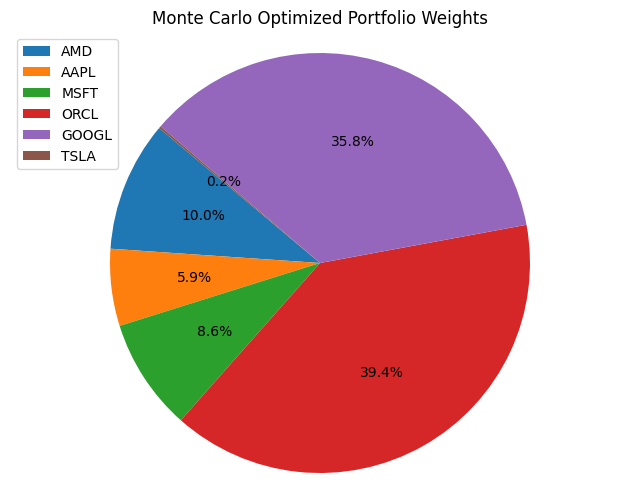

In [37]:
optimal_weights = weights_array[index_max_sharpe, :]

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(optimal_weights, autopct='%1.1f%%', startangle=140)
plt.legend(labels=stock_list, loc="upper left", fontsize=10)
plt.title('Monte Carlo Optimized Portfolio Weights')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Portfolio Visualization (scatter chart)
We can use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, we can visualize where the optimal portfolio appears among all of the scenarios.

In [38]:
import plotly.express as px
import plotly.io as pio
pio.renderers.default = 'notebook'

max_sharpe_volatility = volatility_array[index_max_sharpe]
max_sharpe_return = returns_array[index_max_sharpe]

fig = px.scatter(
    x=volatility_array,
    y=returns_array,
    color=sharpe_array,
    color_continuous_scale='Viridis',
    labels={'x': 'Volatility (Risk)', 'y': 'Expected Return'},
    title="Portfolio Risk vs Return"
)

fig.add_scatter(
    x=[max_sharpe_volatility],
    y=[max_sharpe_return],
    mode='markers',
    marker=dict(color='red', size=12),
    name='Max Sharpe'
)

fig.update_coloraxes(colorbar_title="Sharpe Ratio")

fig.update_layout(
    template="plotly_white",
    title_x=0.5,
    font=dict(size=14),
    width=1000,
    height=700,
    coloraxis_colorbar=dict(
        title="Sharpe Ratio",
        len=0.9,         # shorten the colorbar (default is 1)
        y=0.5,           # center it vertically
        yanchor="middle" # anchor from the middle
    ),
    legend=dict(
        x=1.05, y=1,   # move legend slightly above the colorbar
        traceorder="normal",
        bgcolor="rgba(0,0,0,0)",
        bordercolor="rgba(0,0,0,0)"
    ),
    margin=dict(r=140)   # extra space on right
)

fig.show()


## Monte Carlo Optimized Portfolio Results

A Monte Carlo simulation was used to optimize a portfolio consisting of six major technology stocks:

**Stocks**: `AMD`, `AAPL`, `MSFT`, `ORCL`, `GOOGL`, `TSLA`

### Optimal Portfolio Weights
See the pie chart above.

### Performance Metric

- **Sharpe Ratio (Optimized)**:

The optimized Sharpe ratio indicates a **strong risk-adjusted return**, significantly higher than the equal-weighted portfolio benchmark. The optimization notably **reduces exposure to higher-volatility stocks** (e.g., AMD, TSLA) while emphasizing stable performers (MSFT, ORCL, GOOGL).

✅ **Conclusion**:  
The Monte Carlo optimized portfolio delivers superior performance with a **better risk-return trade-off** compared to a simple equal-weighted strategy.